**User Story - HR Dashboard**

As an HR manager, I want a comprehensive dashboard to analyze human resources data, providing both summary views for high-level insights and detailed employee records for in-depth analysis

**Summary View**

The summary view should be divided into three main sections: Overview, Demographics, and Income Analysis

**Overview**

The Overview section should provide a snapshot of the overall HR metrics, including:


*   Display the total number of hired employees, active employees, and terminated employees.
*   Visualize the total number of hired and terminated employees over the years.

*   Present a breakdown of total employees by department and job titles.
*   Compare total employees between headquarters (HQ) and branches (New York is the HQ)
*   Show the distribution of employees by city and state.

**Demographics**

The Demographics section should offer insights into the composition of the workforce, including:


*   Present the gender ratio in the company.
*   Visualize the distribution of employees across age groups and education levels.
*   Show the total number of employees within each age group.
*   Show the total number of employees within each education level.
*   Present the correlation between employees’s educational backgrounds and their performance ratings.

**Income**

The income analysis section should focus on salary-related metrics, including:

*   Compare salaries across different education levels for both genders to identify any discrepancies or patterns.
*   Present how the age correlate with the salary for employees in each department.

**Employee Records View**
*   Provide a comprehensive list of all employees with necessary information such as name, department, position, gender, age, education, and salary.
*   Users should be able to filter the list based on any of the available columns.





In [4]:
import pandas as pd
import numpy as np
from faker import Faker
from datetime import datetime, timedelta
import random

# Initialize Faker
fake = Faker('en_US')
Faker.seed(42)
np.random.seed(42)
random.seed(42)

# Configuration
num_records = 8950

# States & Cities
states_cities = {
    'New York': ['New York City', 'Buffalo', 'Rochester'],
    'Virginia': ['Virginia Beach', 'Norfolk', 'Richmond'],
    'Florida': ['Miami', 'Orlando', 'Tampa'],
    'Illinois': ['Chicago', 'Aurora', 'Naperville'],
    'Pennsylvania': ['Philadelphia', 'Pittsburgh', 'Allentown'],
    'Ohio': ['Columbus', 'Cleveland', 'Cincinnati'],
    'North Carolina': ['Charlotte', 'Raleigh', 'Greensboro'],
    'Michigan': ['Detroit', 'Grand Rapids', 'Warren']
}
states = list(states_cities.keys())
state_prob = [0.7, 0.02, 0.01, 0.03, 0.05, 0.03, 0.05, 0.11]
assigned_states = np.random.choice(states, size=num_records, p=state_prob)
assigned_cities = [np.random.choice(states_cities[state]) for state in assigned_states]

# Departments & Jobtitles
departments = ['HR', 'IT', 'Sales', 'Marketing', 'Finance', 'Operations', 'Customer Service']
departments_prob = [0.02, 0.15, 0.21, 0.08, 0.05, 0.30, 0.19]
jobtitles = {
    'HR': ['HR Manager', 'HR Coordinator', 'Recruiter', 'HR Assistant'],
    'IT': ['IT Manager', 'Software Developer', 'System Administrator', 'IT Support Specialist'],
    'Sales': ['Sales Manager', 'Sales Consultant', 'Sales Specialist', 'Sales Representative'],
    'Marketing': ['Marketing Manager', 'SEO Specialist', 'Content Creator', 'Marketing Coordinator'],
    'Finance': ['Finance Manager', 'Accountant', 'Financial Analyst', 'Accounts Payable Specialist'],
    'Operations': ['Operations Manager', 'Operations Analyst', 'Logistics Coordinator', 'Inventory Specialist'],
    'Customer Service': ['Customer Service Manager', 'Customer Service Representative', 'Support Specialist', 'Help Desk Technician']
}
jobtitles_prob = {
    'HR': [0.03, 0.3, 0.47, 0.2],  # HR Manager, HR Coordinator, Recruiter, HR Assistant
    'IT': [0.02, 0.47, 0.2, 0.31],  # IT Manager, Software Developer, System Administrator, IT Support Specialist
    'Sales': [0.03, 0.25, 0.32, 0.4],  # Sales Manager, Sales Consultant, Sales Specialist, Sales Representative
    'Marketing': [0.04, 0.25, 0.41, 0.3],  # Marketing Manager, SEO Specialist, Content Creator, Marketing Coordinator
    'Finance': [0.03, 0.37, 0.4, 0.2],  # Finance Manager, Accountant, Financial Analyst, Accounts Payable Specialist
    'Operations': [0.02, 0.2, 0.4, 0.38],  # Operations Manager, Operations Analyst, Logistics Coordinator, Inventory Specialist
    'Customer Service': [0.04, 0.3, 0.38, 0.28]  # Customer Service Manager, Customer Service Representative, Support Specialist, Help Desk Technician
}

# Educations
educations = ['High School', "Bachelor", "Master", 'PhD']

education_mapping = {
    'HR Manager': ["Master", "PhD"],
    'HR Coordinator': ["Bachelor", "Master"],
    'Recruiter': ["High School", "Bachelor"],
    'HR Assistant': ["High School", "Bachelor"],
    'IT Manager': ["PhD", "Master"],
    'Software Developer': ["Bachelor", "Master"],
    'System Administrator': ["Bachelor", "Master"],
    'IT Support Specialist': ["High School", "Bachelor"],
    'Sales Manager': ["Master","PhD"],
    'Sales Consultant': ["Bachelor", "Master", "PhD"],
    'Sales Specialist': ["Bachelor", "Master", "PhD"],
    'Sales Representative': ["Bachelor"],
    'Marketing Manager': ["Bachelor", "Master","PhD"],
    'SEO Specialist': ["High School", "Bachelor"],
    'Content Creator': ["High School", "Bachelor"],
    'Marketing Coordinator': ["Bachelor"],
    'Finance Manager': ["Master", "PhD"],
    'Accountant': ["Bachelor"],
    'Financial Analyst': ["Bachelor", "Master", "PhD"],
    'Accounts Payable Specialist': ["Bachelor"],
    'Operations Manager': ["Bachelor", "Master"],
    'Operations Analyst': ["Bachelor", "Master"],
    'Logistics Coordinator': ["Bachelor"],
    'Inventory Specialist': ["High School", "Bachelor"],
    'Customer Service Manager': ["Bachelor", "Master", "PhD"],
    'Customer Service Representative': ["High School", "Bachelor"],
    'Support Specialist': ["High School", "Bachelor"],
    'Customer Success Manager': ["Bachelor", "Master", "PhD"],
    'Help Desk Technician': ["High School", "Bachelor"]
}

# Hiring Date
# Define custom probability weights for each year
year_weights = {
    2015: 5,   # 15% probability
    2016: 8,   # 15% probability
    2017: 17,   # 20% probability
    2018: 9,  # 15% probability
    2019: 10,  # 10% probability
    2020: 11,  # 10% probability
    2021: 5,  # 8% probability
    2022: 12,  # 5% probability
    2023: 14,  # 2% probability
    2024: 9   # 2% probability
}


# Generate a random date based on custom probabilities
def generate_custom_date(year_weights):
    year = random.choices(list(year_weights.keys()), weights=list(year_weights.values()))[0]
    month = random.randint(1, 12)
    day = random.randint(1, 28)  # Assuming all months have 28 days for simplicity
    return fake.date_time_between(start_date=datetime(year, 1, 1), end_date=datetime(year, 12, 31))

def generate_salary(department, job_title):
    salary_dict = {
            'HR': {
                'HR Manager': np.random.randint(60000, 90000),
                'HR Coordinator': np.random.randint(50000, 60000),
                'Recruiter': np.random.randint(50000, 70000),
                'HR Assistant': np.random.randint(50000, 60000)
            },
            'IT': {
                'IT Manager': np.random.randint(80000, 120000),
                'Software Developer': np.random.randint(70000, 95000),
                'System Administrator': np.random.randint(60000, 90000),
                'IT Support Specialist': np.random.randint(50000, 60000)
            },
            'Sales': {
                'Sales Manager': np.random.randint(70000, 110000),
                'Sales Consultant': np.random.randint(60000, 90000),
                'Sales Specialist': np.random.randint(50000, 80000),
                'Sales Representative': np.random.randint(50000, 70000)
            },
            'Marketing': {
                'Marketing Manager': np.random.randint(70000, 100000),
                'SEO Specialist': np.random.randint(50000, 80000),
                'Content Creator': np.random.randint(50000, 60000),
                'Marketing Coordinator': np.random.randint(50000, 70000)
            },
            'Finance': {
                'Finance Manager': np.random.randint(80000, 120000),
                'Accountant': np.random.randint(50000, 80000),
                'Financial Analyst': np.random.randint(60000, 90000),
                'Accounts Payable Specialist': np.random.randint(50000, 60000)
            },
            'Operations': {
                'Operations Manager': np.random.randint(70000, 100000),
                'Operations Analyst': np.random.randint(50000, 80000),
                'Logistics Coordinator': np.random.randint(50000, 60000),
                'Inventory Specialist': np.random.randint(50000, 60000)
            },
            'Customer Service': {
                'Customer Service Manager': np.random.randint(60000, 90000),
                'Customer Service Representative': np.random.randint(50000, 60000),
                'Support Specialist': np.random.randint(50000, 60000),
                'Help Desk Technician': np.random.randint(50000, 80000)
            }
        }
    return salary_dict[department][job_title]

# Generate the dataset
data = []

for _ in range(num_records):
    employee_id = f"00-{random.randint(10000000, 99999999)}"
    first_name = fake.first_name()
    last_name = fake.last_name()
    gender = np.random.choice(['Female', 'Male'], p=[0.46, 0.54])
    state = np.random.choice(states, p=state_prob)
    city = np.random.choice(states_cities[state])
    hiredate = generate_custom_date(year_weights)
      #termdate
    department = np.random.choice(departments, p=departments_prob)
    job_title  = np.random.choice(jobtitles[department], p=jobtitles_prob[department])
    education_level = np.random.choice(education_mapping[job_title])
    performance_rating = np.random.choice(['Excellent', 'Good', 'Satisfactory', 'Needs Improvement'], p=[0.12, 0.5, 0.3, 0.08])
    overtime = np.random.choice(['Yes', 'No'], p=[0.3, 0.7])
    salary = generate_salary(department, job_title)

    data.append([
        employee_id,
        first_name,
        last_name,
        gender,
        state,
        city,
        hiredate,
        department,
        job_title,
        education_level,
        salary,
        performance_rating,
        overtime
    ])

## Create DataFrame
columns = [
     'employee_id',
     'first_name',
     'last_name',
     'gender',
     'state',
     'city',
     'hiredate',
     'department',
     'job_title',
     'education_level',
     'salary',
     'performance_rating',
     'overtime'
    ]


df = pd.DataFrame(data, columns=columns)

# Add Birthdate
def generate_birthdate(row):
    age_distribution = {
        'under_25': 0.11,
        '25_34': 0.25,
        '35_44': 0.31,
        '45_54': 0.24,
        'over_55': 0.09
    }
    age_groups = list(age_distribution.keys())
    age_probs = list(age_distribution.values())
    age_group = np.random.choice(age_groups, p=age_probs)

    if any('Manager' in title for title in row['job_title']):
        age = np.random.randint(30, 65)
    elif row['education_level'] == 'PhD':
        age = np.random.randint(27, 65)
    elif age_group == 'under_25':
         age = np.random.randint(20, 25)
    elif age_group == '25_34':
        age = np.random.randint(25, 35)
    elif age_group == '35_44':
        age = np.random.randint(35, 45)
    elif age_group == '45_54':
        age = np.random.randint(45, 55)
    else:
        age = np.random.randint(56, 65)

    birthdate = fake.date_of_birth(minimum_age=age, maximum_age=age)
    return birthdate

# Apply the function to generate birthdates
df['birthdate'] = df.apply(generate_birthdate, axis=1)

# Terminations
# Define termination distribution
year_weights = {
    2015: 5,
    2016: 7,
    2017: 10,
    2018: 12,
    2019: 9,
    2020: 10,
    2021: 20,
    2022: 10,
    2023: 7,
    2024: 10
}

# Calculate the total number of terminated employees
total_employees = num_records
termination_percentage = 0.112  # 11.2%
total_terminated = int(total_employees * termination_percentage)

# Generate termination dates based on distribution
termination_dates = []
for year, weight in year_weights.items():
    num_terminations = int(total_terminated * (weight / 100))
    termination_dates.extend([year] * num_terminations)

# Randomly shuffle the termination dates
random.shuffle(termination_dates)

# Assign termination dates to terminated employees
terminated_indices = df.index[:total_terminated]
for i, year in enumerate(termination_dates[:total_terminated]):
    df.at[terminated_indices[i], 'termdate'] = datetime(year, 1, 1) + timedelta(days=random.randint(0, 365))


# Assign None to termdate for employees who are not terminated
df['termdate'] = df['termdate'].where(df['termdate'].notnull(), None)

# Ensure termdate is at least 6 months after hiredat
df['termdate'] = df.apply(lambda row: row['hiredate'] + timedelta(days=180) if row['termdate'] and row['termdate'] < row['hiredate'] + timedelta(days=180) else row['termdate'], axis=1)

education_multiplier = {
    'High School': {'Male': 1.03, 'Female': 1.0},
    "Bachelor": {'Male': 1.115, 'Female': 1.0},
    "Master": {'Male': 1.0, 'Female': 1.07},
    'PhD': {'Male': 1.0, 'Female': 1.17}
}


# Function to calculate age from birthdate
def calculate_age(birthdate):
    today = pd.Timestamp('today')
    age = today.year - birthdate.year - ((today.month, today.day) < (birthdate.month, birthdate.day))
    return age

# Function to calculate the adjusted salary
def calculate_adjusted_salary(row):
    base_salary = row['salary']
    gender = row['gender']
    education = row['education_level']
    age = calculate_age(row['birthdate'])

    # Apply education multiplier
    multiplier = education_multiplier.get(education, {}).get(gender, 1.0)
    adjusted_salary = base_salary * multiplier

    # Apply age increment (between 0.1% and 0.3% per year of age)
    age_increment = 1 + np.random.uniform(0.001, 0.003) * age
    adjusted_salary *= age_increment

    # Ensure the adjusted salary is not lower than the base salary
    adjusted_salary = max(adjusted_salary, base_salary)

    # Round the adjusted salary to the nearest integer
    return round(adjusted_salary)

# Apply the function to the DataFrame
df['salary'] = df.apply(calculate_adjusted_salary, axis=1)

# Convert 'hiredate' and 'birthdate' to datetime
df['hiredate'] = pd.to_datetime(df['hiredate']).dt.date
df['birthdate'] = pd.to_datetime(df['birthdate']).dt.date
df['termdate'] = pd.to_datetime(df['termdate']).dt.date

print(df)

# Save to CSV
df.to_csv('HumanResources.csv', index=False)

      employee_id first_name  last_name  gender           state  \
0     00-95822412   Danielle    Johnson  Female        New York   
1     00-42868828    Jeffrey      Doyle    Male  North Carolina   
2     00-83197857   Patricia     Miller    Male        New York   
3     00-13999315    Anthony   Robinson    Male        New York   
4     00-90801586    Anthony   Gonzalez  Female        New York   
...           ...        ...        ...     ...             ...   
8945  00-29226627    Michael   Campbell    Male        New York   
8946  00-15091628     Robert       Snow    Male        New York   
8947  00-68025539    Timothy    Elliott  Female        Michigan   
8948  00-19066901   Nicholas  Robertson    Male  North Carolina   
8949  00-50413766     Nathan     Oneill  Female        New York   

               city    hiredate        department              job_title  \
0           Buffalo  2016-04-10  Customer Service   Help Desk Technician   
1         Charlotte  2017-09-04            

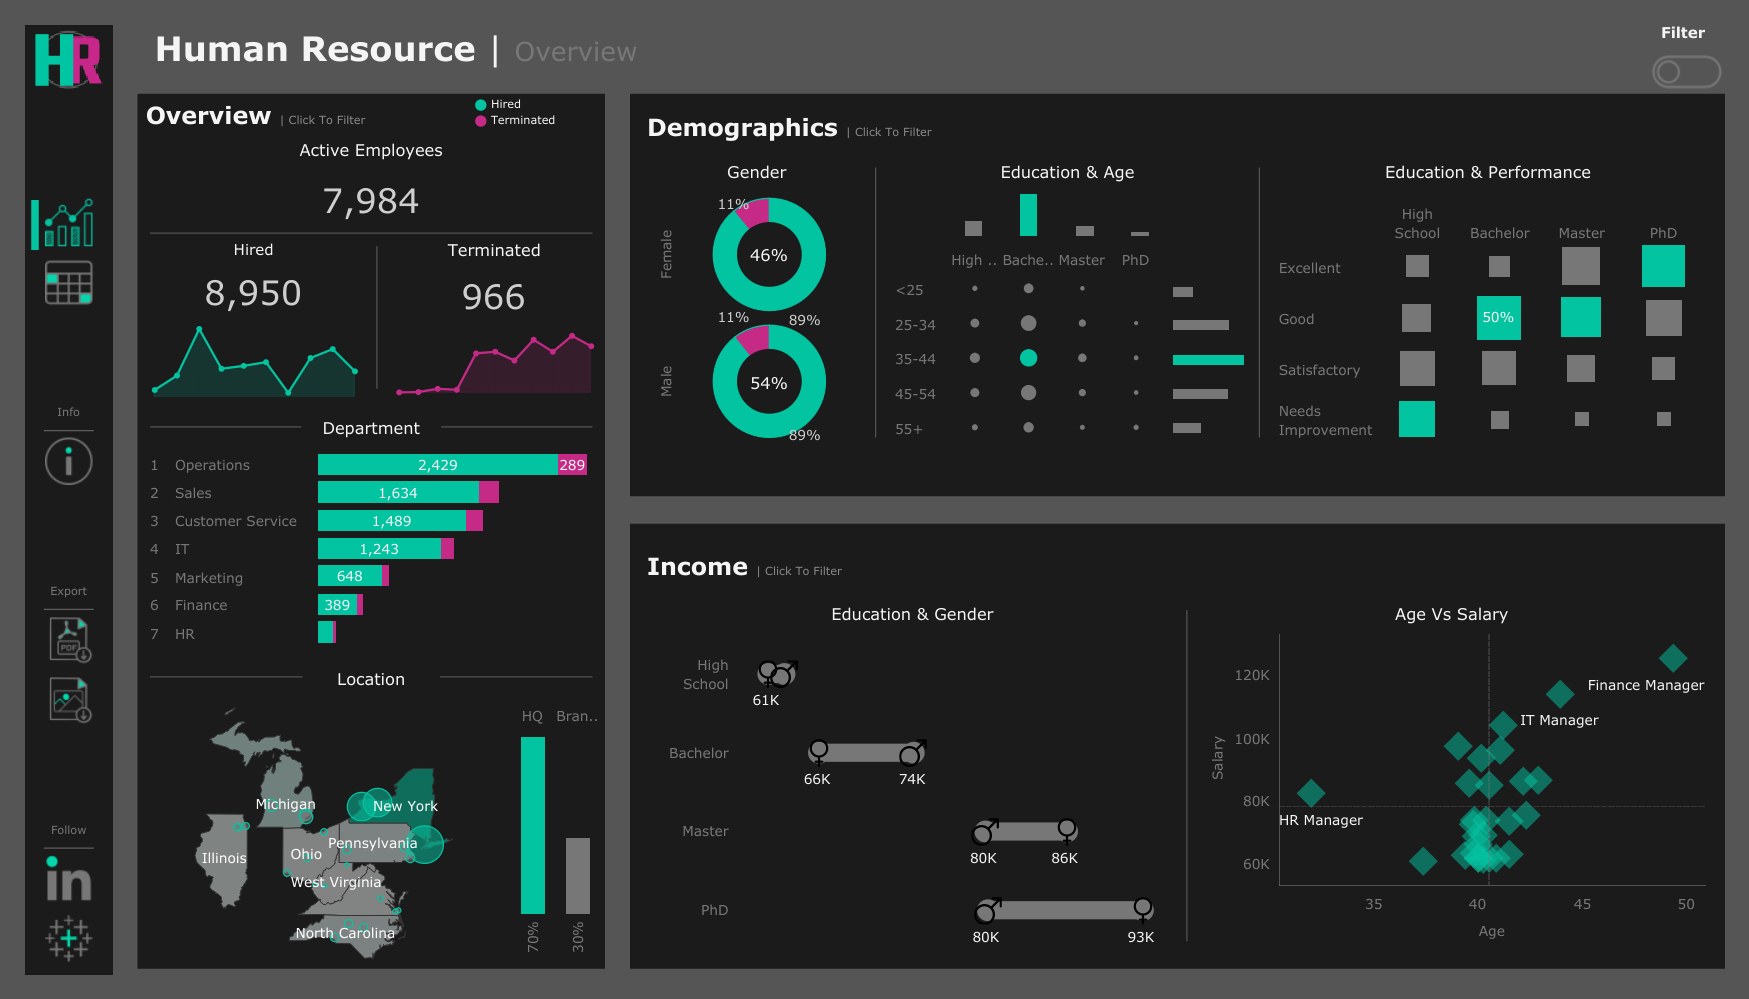

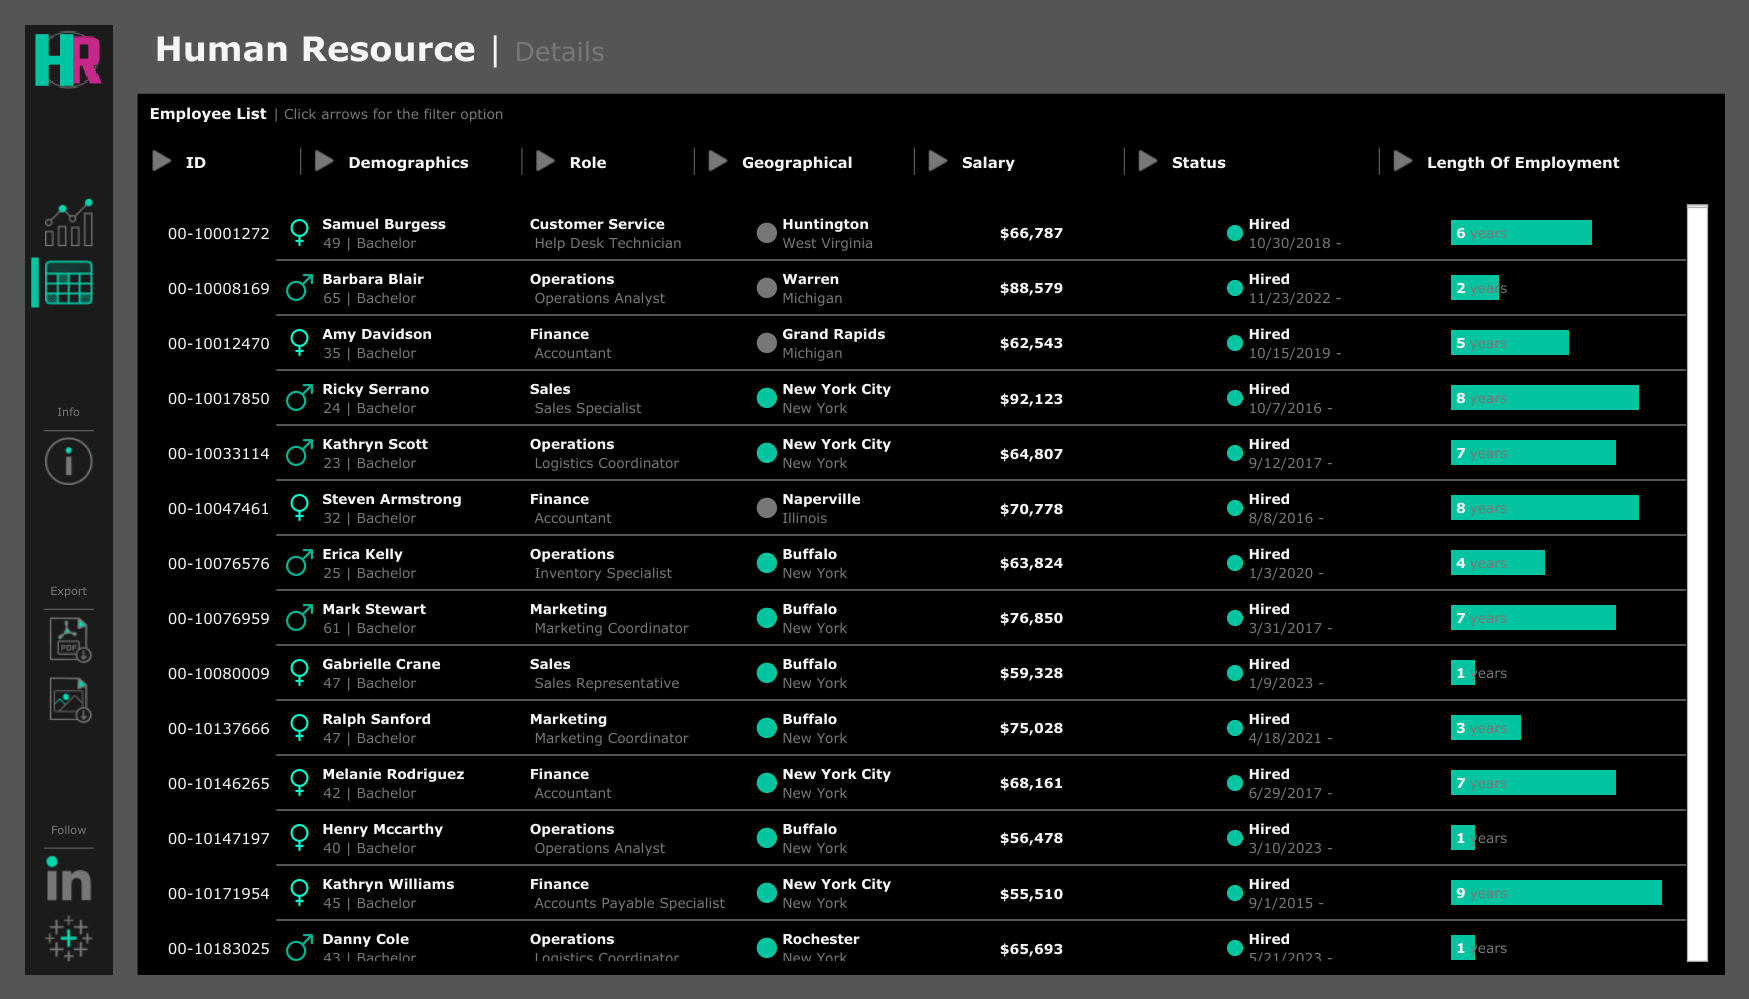